In [2]:
import os
import pandas as pd
from sklearn.model_selection import KFold, StratifiedKFold

In [3]:
image_sizes = [128, 128, 128]

data_dir = "/Volumes/Data/kaggle/raw"

In [16]:
df_train: pd.DataFrame = pd.read_csv(os.path.join(data_dir, 'train.csv'))
mask_files: list = os.listdir(f'{data_dir}/segmentations')
df_mask: pd.DataFrame = pd.DataFrame({
    'mask_file': mask_files,
})
df_mask['StudyInstanceUID'] = df_mask['mask_file'].apply(
  lambda x: x[:-4]
)
df_mask['mask_file'] = df_mask['mask_file'].apply(
  lambda x: os.path.join(data_dir, 'segmentations', x)
)
df = df_train.merge(df_mask, on='StudyInstanceUID', how='left')
df['image_folder'] = df['StudyInstanceUID'].apply(
  lambda x: os.path.join(data_dir, 'train_images', x)
)
df_seg = df[df["mask_file"].notna()].reset_index(drop=True)

kf: KFold = KFold(5)
df_seg['fold'] = -1
for fold, (train_idx, validation_idx) in enumerate(kf.split(df_seg, df_seg)):
  df_seg.loc[validation_idx, 'fold'] = fold

display(df_train)
display(df_mask)
display(df)
display(df_seg)

,StudyInstanceUID,patient_overall,C1,C2,C3,C4,C5,C6,C7
0,1.2.826.0.1.3680043.6200,1,1,1,0,0,0,0,0
1,1.2.826.0.1.3680043.27262,1,0,1,0,0,0,0,0
2,1.2.826.0.1.3680043.21561,1,0,1,0,0,0,0,0
3,1.2.826.0.1.3680043.12351,0,0,0,0,0,0,0,0
4,1.2.826.0.1.3680043.1363,1,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...
2014,1.2.826.0.1.3680043.21684,1,0,1,0,0,0,1,1
2015,1.2.826.0.1.3680043.4786,1,0,0,0,0,0,0,1
2016,1.2.826.0.1.3680043.14341,0,0,0,0,0,0,0,0
2017,1.2.826.0.1.3680043.12053,0,0,0,0,0,0,0,0


,mask_file,StudyInstanceUID
0,/Volumes/Data/kaggle/raw/segmentations/1.2.826...,1.2.826.0.1.3680043.2243
1,/Volumes/Data/kaggle/raw/segmentations/1.2.826...,1.2.826.0.1.3680043.3376
2,/Volumes/Data/kaggle/raw/segmentations/1.2.826...,1.2.826.0.1.3680043.18906
3,/Volumes/Data/kaggle/raw/segmentations/1.2.826...,1.2.826.0.1.3680043.18480
4,/Volumes/Data/kaggle/raw/segmentations/1.2.826...,1.2.826.0.1.3680043.30640
...,...,...
82,/Volumes/Data/kaggle/raw/segmentations/1.2.826...,1.2.826.0.1.3680043.24606
83,/Volumes/Data/kaggle/raw/segmentations/1.2.826...,1.2.826.0.1.3680043.8574
84,/Volumes/Data/kaggle/raw/segmentations/1.2.826...,1.2.826.0.1.3680043.27292
85,/Volumes/Data/kaggle/raw/segmentations/1.2.826...,1.2.826.0.1.3680043.6376


,StudyInstanceUID,patient_overall,C1,C2,C3,C4,C5,C6,C7,mask_file,image_folder
0,1.2.826.0.1.3680043.6200,1,1,1,0,0,0,0,0,NaN,/Volumes/Data/kaggle/raw/train_images/1.2.826....
1,1.2.826.0.1.3680043.27262,1,0,1,0,0,0,0,0,NaN,/Volumes/Data/kaggle/raw/train_images/1.2.826....
2,1.2.826.0.1.3680043.21561,1,0,1,0,0,0,0,0,NaN,/Volumes/Data/kaggle/raw/train_images/1.2.826....
3,1.2.826.0.1.3680043.12351,0,0,0,0,0,0,0,0,NaN,/Volumes/Data/kaggle/raw/train_images/1.2.826....
4,1.2.826.0.1.3680043.1363,1,0,0,0,0,1,0,0,/Volumes/Data/kaggle/raw/segmentations/1.2.826...,/Volumes/Data/kaggle/raw/train_images/1.2.826....
...,...,...,...,...,...,...,...,...,...,...,...
2014,1.2.826.0.1.3680043.21684,1,0,1,0,0,0,1,1,NaN,/Volumes/Data/kaggle/raw/train_images/1.2.826....
2015,1.2.826.0.1.3680043.4786,1,0,0,0,0,0,0,1,NaN,/Volumes/Data/kaggle/raw/train_images/1.2.826....
2016,1.2.826.0.1.3680043.14341,0,0,0,0,0,0,0,0,NaN,/Volumes/Data/kaggle/raw/train_images/1.2.826....
2017,1.2.826.0.1.3680043.12053,0,0,0,0,0,0,0,0,NaN,/Volumes/Data/kaggle/raw/train_images/1.2.826....


,StudyInstanceUID,patient_overall,C1,C2,C3,C4,C5,C6,C7,mask_file,image_folder,fold
0,1.2.826.0.1.3680043.1363,1,0,0,0,0,1,0,0,/Volumes/Data/kaggle/raw/segmentations/1.2.826...,/Volumes/Data/kaggle/raw/train_images/1.2.826....,0
1,1.2.826.0.1.3680043.25704,0,0,0,0,0,0,0,0,/Volumes/Data/kaggle/raw/segmentations/1.2.826...,/Volumes/Data/kaggle/raw/train_images/1.2.826....,0
2,1.2.826.0.1.3680043.20647,0,0,0,0,0,0,0,0,/Volumes/Data/kaggle/raw/segmentations/1.2.826...,/Volumes/Data/kaggle/raw/train_images/1.2.826....,0
3,1.2.826.0.1.3680043.31077,1,0,0,1,1,1,1,0,/Volumes/Data/kaggle/raw/segmentations/1.2.826...,/Volumes/Data/kaggle/raw/train_images/1.2.826....,0
4,1.2.826.0.1.3680043.17960,0,0,0,0,0,0,0,0,/Volumes/Data/kaggle/raw/segmentations/1.2.826...,/Volumes/Data/kaggle/raw/train_images/1.2.826....,0
...,...,...,...,...,...,...,...,...,...,...,...,...
82,1.2.826.0.1.3680043.32071,1,0,1,0,1,0,1,1,/Volumes/Data/kaggle/raw/segmentations/1.2.826...,/Volumes/Data/kaggle/raw/train_images/1.2.826....,4
83,1.2.826.0.1.3680043.30524,1,0,0,0,0,0,1,1,/Volumes/Data/kaggle/raw/segmentations/1.2.826...,/Volumes/Data/kaggle/raw/train_images/1.2.826....,4
84,1.2.826.0.1.3680043.28025,0,0,0,0,0,0,0,0,/Volumes/Data/kaggle/raw/segmentations/1.2.826...,/Volumes/Data/kaggle/raw/train_images/1.2.826....,4
85,1.2.826.0.1.3680043.21321,1,1,1,1,0,0,0,1,/Volumes/Data/kaggle/raw/segmentations/1.2.826...,/Volumes/Data/kaggle/raw/train_images/1.2.826....,4


In [49]:
import pydicom
from pathlib import Path
from typing import Generator

image_folder: Path = Path(df_seg.loc[0, "image_folder"])
images: Generator = image_folder.glob("*")
image_path: str = next(images)
image_path

PosixPath('/Volumes/Data/kaggle/raw/train_images/1.2.826.0.1.3680043.1363/16.dcm')

In [24]:
dicom = pydicom.read_file(image_path)
dicom

Dataset.file_meta -------------------------------
(0002, 0001) File Meta Information Version       OB: b'\x00\x01'
(0002, 0002) Media Storage SOP Class UID         UI: CT Image Storage
(0002, 0003) Media Storage SOP Instance UID      UI: 1.2.826.0.1.3680043.1363.1.16
(0002, 0010) Transfer Syntax UID                 UI: Explicit VR Little Endian
(0002, 0012) Implementation Class UID            UI: 1.2.40.0.13.1.1.1
(0002, 0013) Implementation Version Name         SH: 'PYDICOM 2.3.0'
-------------------------------------------------
(0008, 0018) SOP Instance UID                    UI: 1.2.826.0.1.3680043.1363.1.16
(0008, 0023) Content Date                        DA: '20220727'
(0008, 0033) Content Time                        TM: '183922.928430'
(0010, 0010) Patient's Name                      PN: '1363'
(0010, 0020) Patient ID                          LO: '1363'
(0018, 0050) Slice Thickness                     DS: '1.0'
(0020, 000d) Study Instance UID                  UI: 1.2.826.0.1.368

(-0.5, 511.5, 511.5, -0.5)

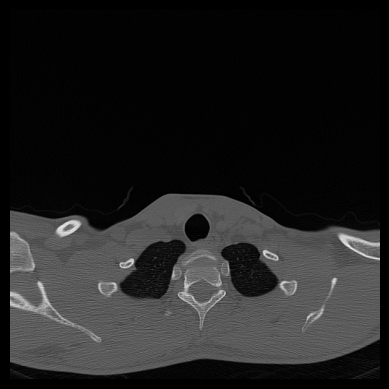

In [32]:
import matplotlib.pyplot as plt

plt.imshow(dicom.pixel_array, cmap="gray")
plt.axis('off')

(-0.5, 511.5, 511.5, -0.5)

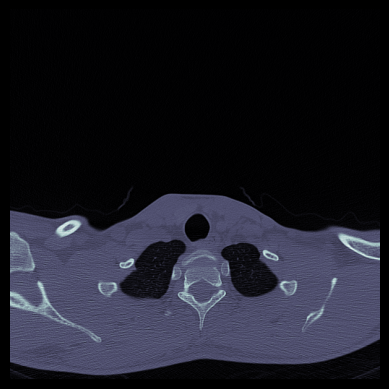

In [38]:
plt.imshow(dicom.pixel_array, cmap=plt.cm.bone)
plt.axis('off')